In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Drop rows with missing values and convert categorical data to numeric
titanic.dropna(inplace=True)
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [ ]:
# Define our features and target
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic[target], test_size=0.2, random_state=42)

# Train a Random Forest Regressor model and calculate MSE
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'MSE without feature engineering: {mse}')

MSE without feature engineering: 0.16670186486486488


In [ ]:
# Train a Random Forest Regressor model and calculate MSE
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy without feature engineering: {accuracy}')

Accuracy without feature engineering: 0.7297297297297297


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion matrix:\n{conf_matrix}')

Confusion matrix:
[[ 9  5]
 [ 5 18]]


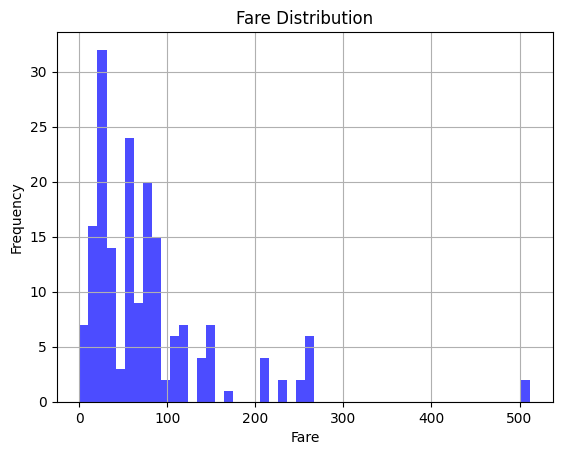

In [ ]:
plt.hist(titanic['Fare'], bins=50, color='blue', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

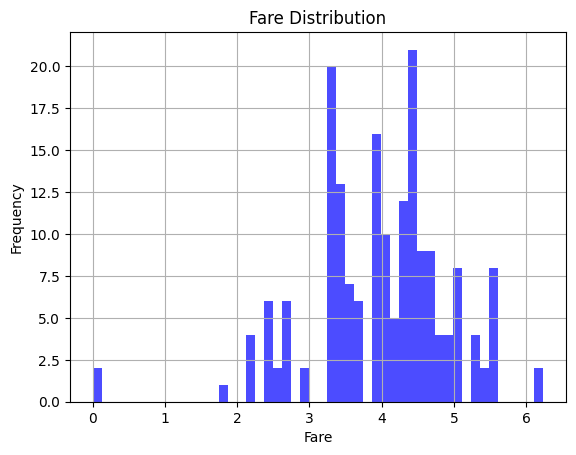

In [ ]:
plt.hist(np.log1p(titanic['Fare']), bins=50, color='blue', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
# Feature engineering steps

# Cut 'Age' into ranges
titanic['Age_Range'] = pd.cut(titanic['Age'], bins=[0,25,100],
                              labels=["Child","Adult"])

titanic['Age_Range'] = le.fit_transform(titanic['Age_Range'])
titanic['LogFare'] = np.log1p(titanic['Fare'])

# Redefine our features and target to include the new features
features = ['Pclass', 'Sex', 'Age', 'LogFare']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic[target], test_size=0.2, random_state=42)

# Train a Random Forest Regressor model and calculate MSE
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE with feature engineering: {mse}')

MSE with feature engineering: 0.16420610810810812


In [ ]:
# Train a Random Forest Regressor model and calculate MSE
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy with feature engineering: {accuracy}')

Accuracy with feature engineering: 0.7297297297297297


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion matrix:\n{conf_matrix}')

Confusion matrix:
[[ 9  5]
 [ 5 18]]
